<a href="https://colab.research.google.com/github/hemilkaklotar/pytorch-cv-pracs/blob/main/01_linear_regression_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises for linear regression

In [ ]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from torch import nn

torch.__version__


'2.2.1+cu121'

In [ ]:
weight = 0.3
bias = 0.9

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim=1)
y = weight * X + bias


X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# spliting the data in to 80% for training and 20% for testing

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data with testing data
  """
  plt.figure(figsize=(10,7))

  # plot training data in scatered as blue color
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  # plot testing data in scattered as green color
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predicted Data")

  plt.legend(prop={"size":14})


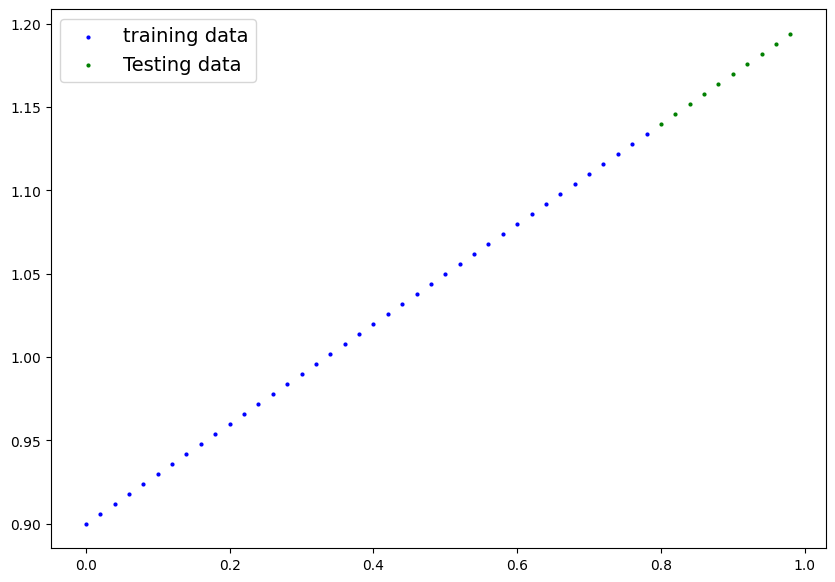

In [ ]:
plot_predictions()

In [ ]:
# creating model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # init linear layer
    self.linear_layer = nn.Linear(in_features=1,out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.4072]])),
              ('linear_layer.bias', tensor([0.8073]))]))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model_2.to(device)

cuda


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4072]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8073], device='cuda:0'))])

In [ ]:
loss_fn = nn.L1Loss()

learning_rate = 0.01

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=learning_rate)

Epoch: 0 | Loss: 0.019788937643170357 | TestLoss: 0.0455477349460125
Epoch: 20 | Loss: 0.012915429659187794 | TestLoss: 0.029689980670809746
Epoch: 40 | Loss: 0.006046757102012634 | TestLoss: 0.013145304284989834
Epoch: 60 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 80 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 100 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 120 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 140 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 160 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 180 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 200 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 220 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 240 | Loss: 0.008995472453534603 | TestLoss: 0.005184197332710028
Epoch: 260 | Loss: 0.008995472453534603 | TestLoss: 0.00518

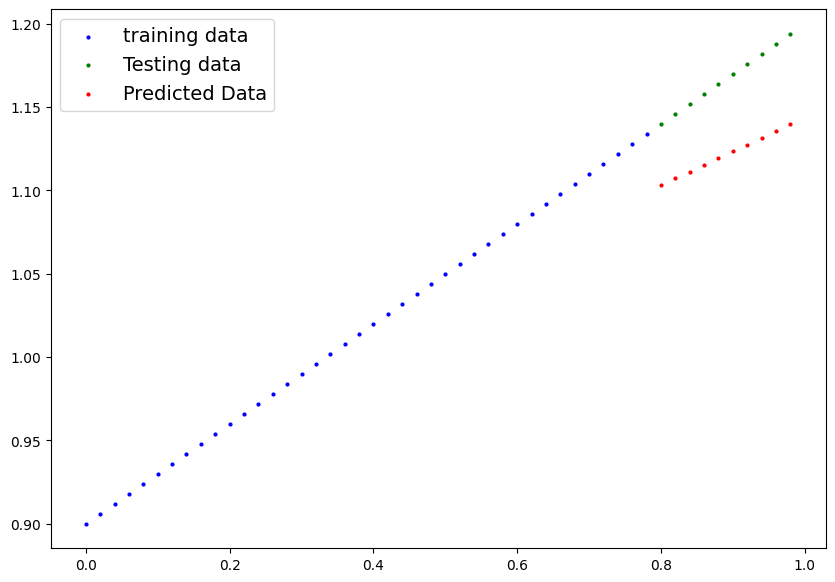

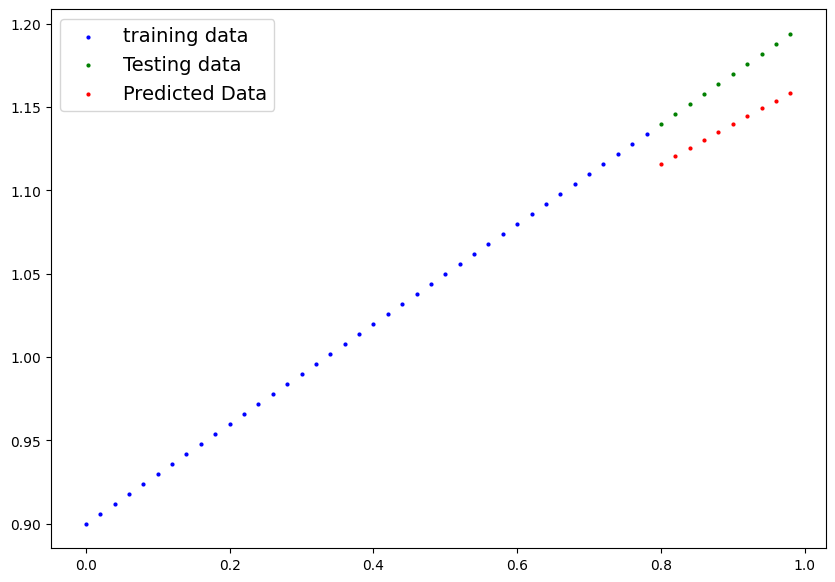

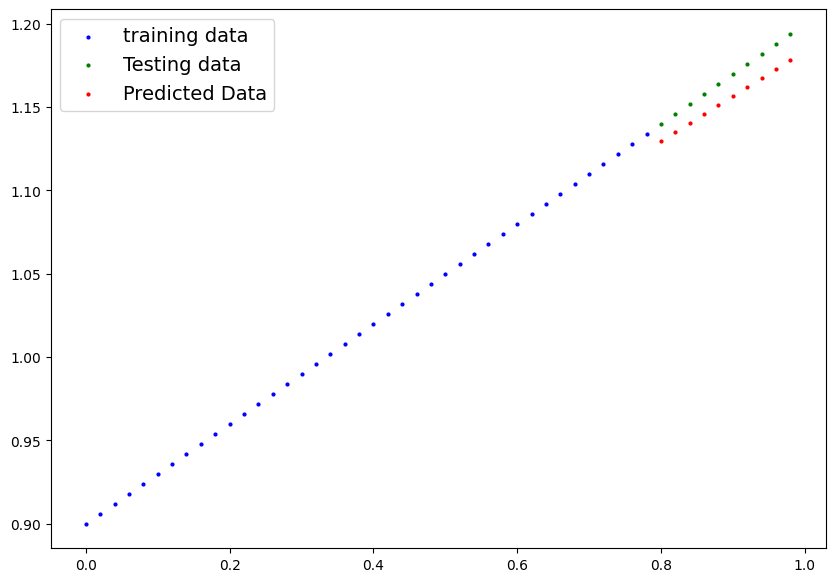

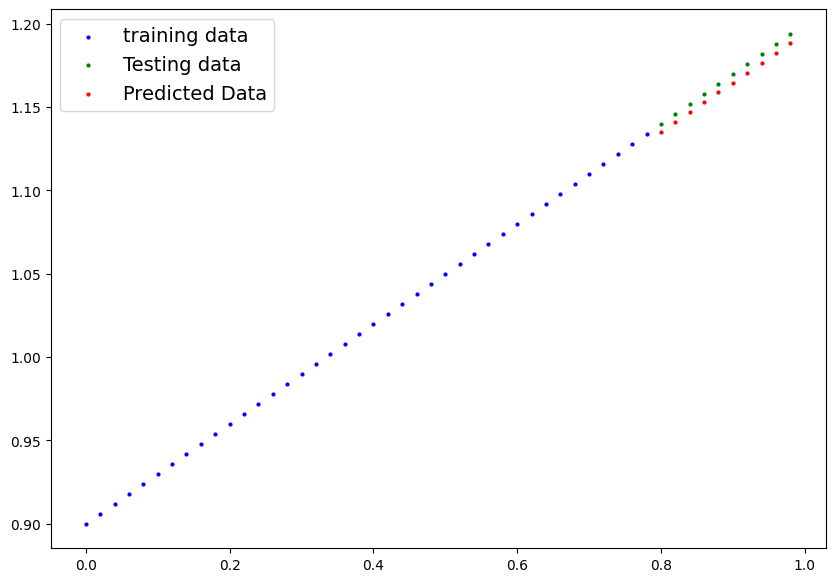

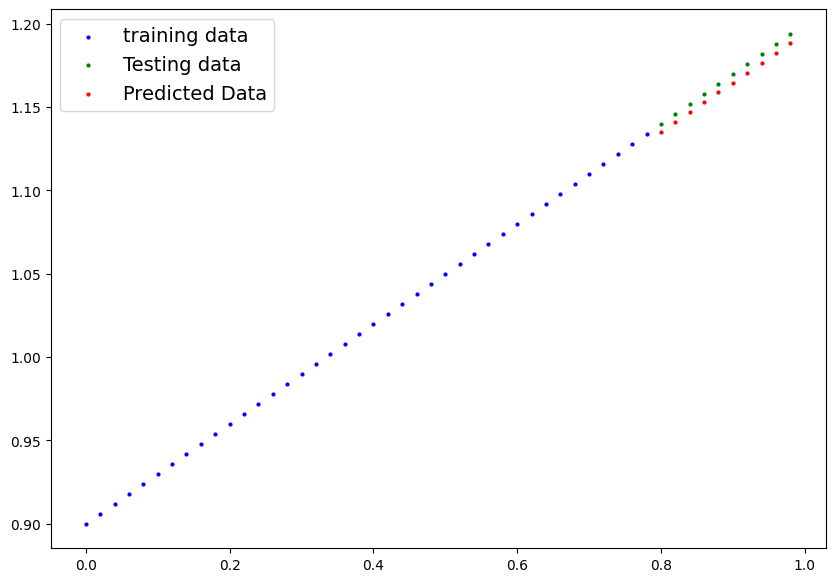

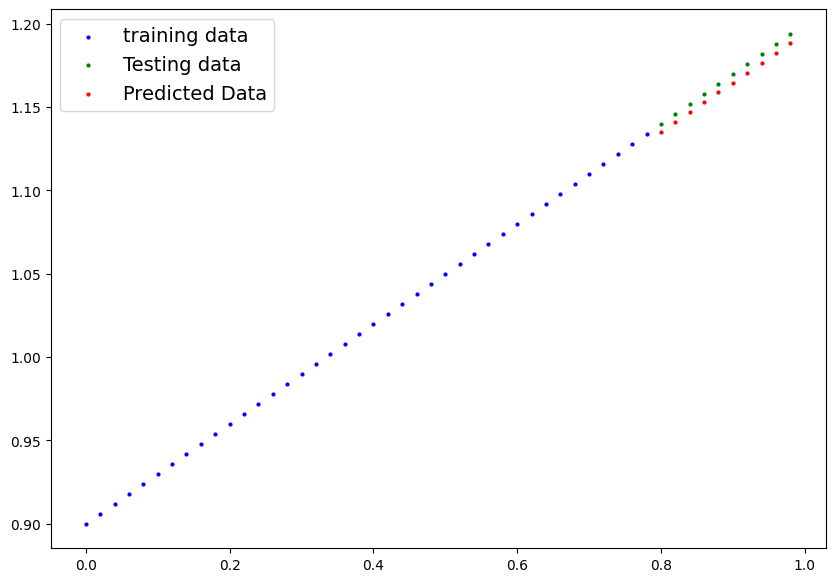

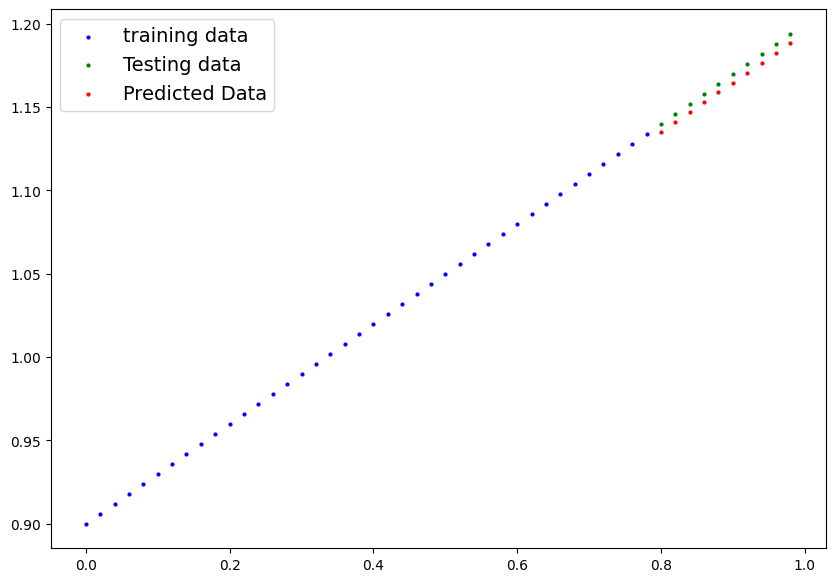

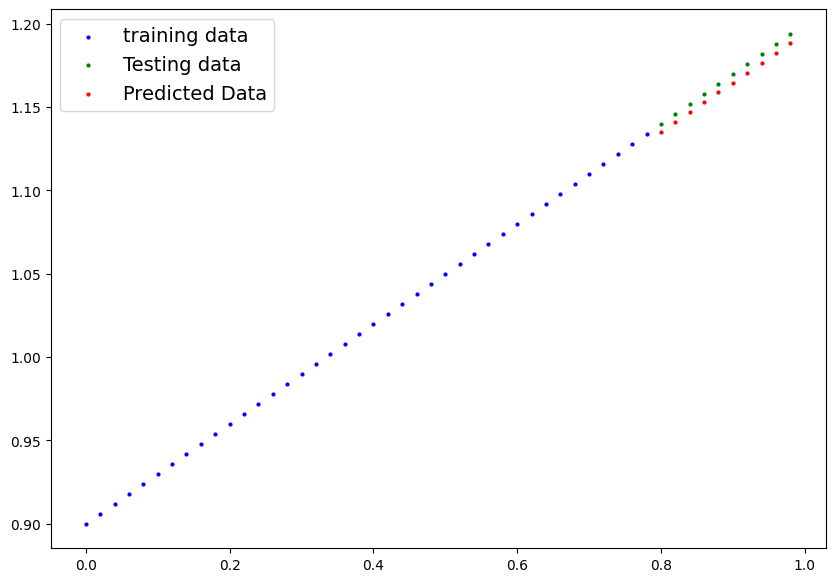

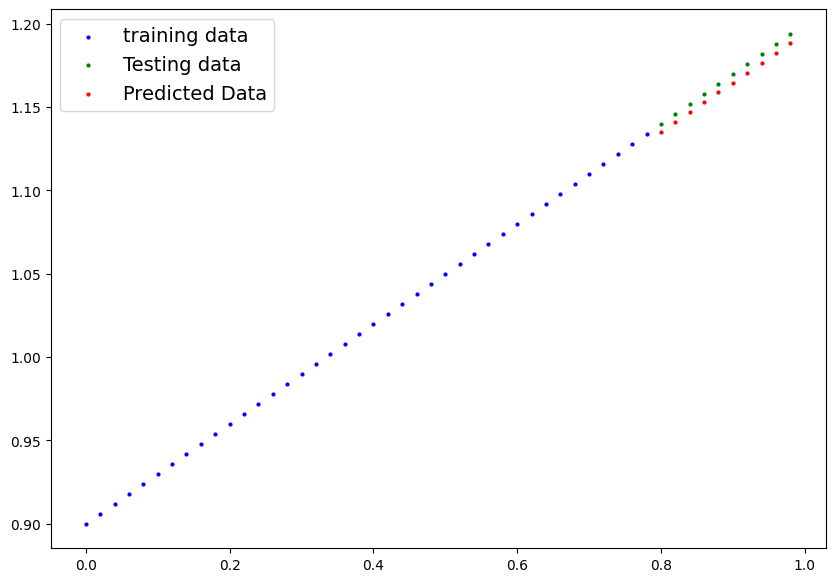

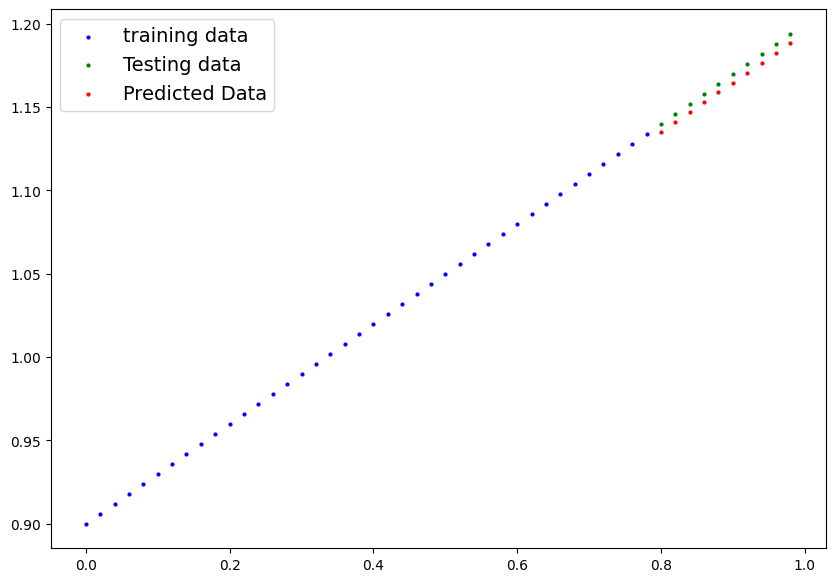

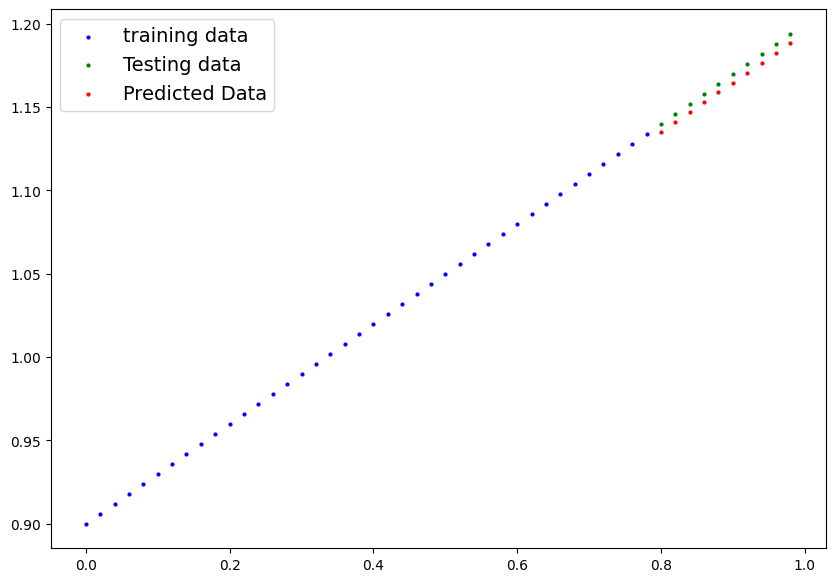

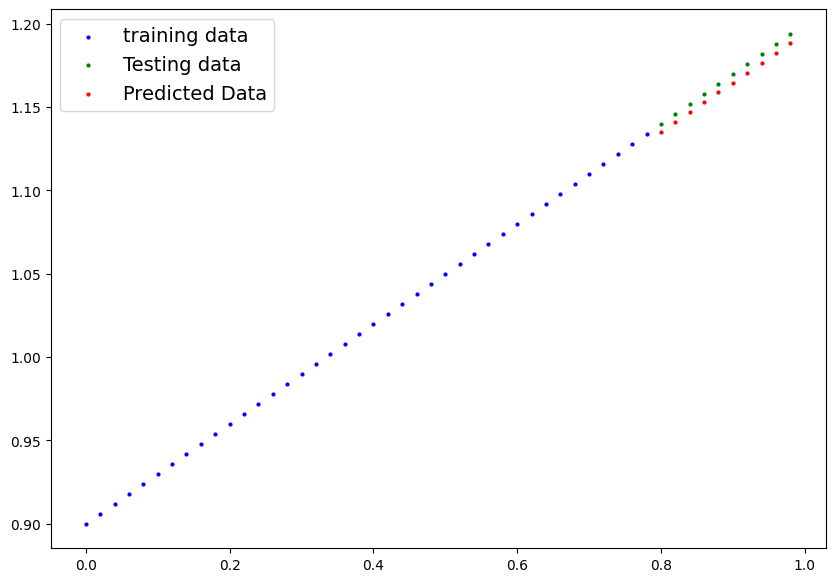

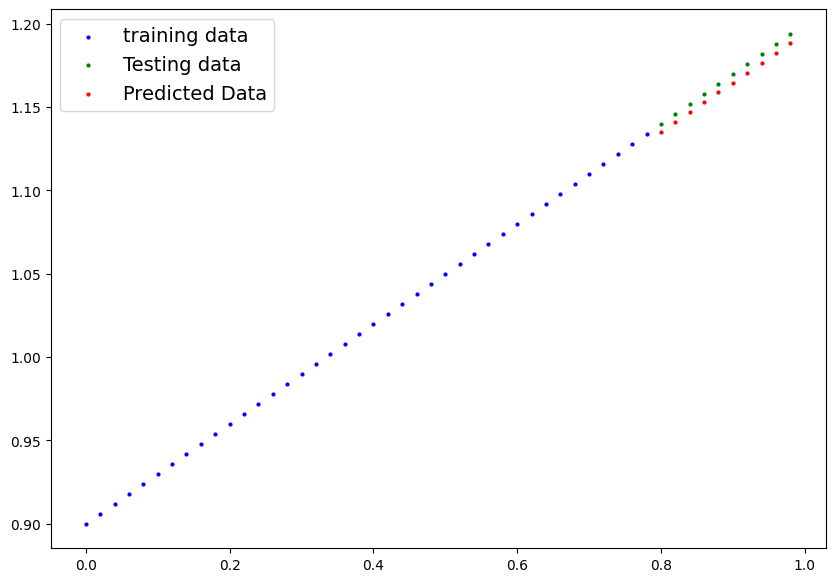

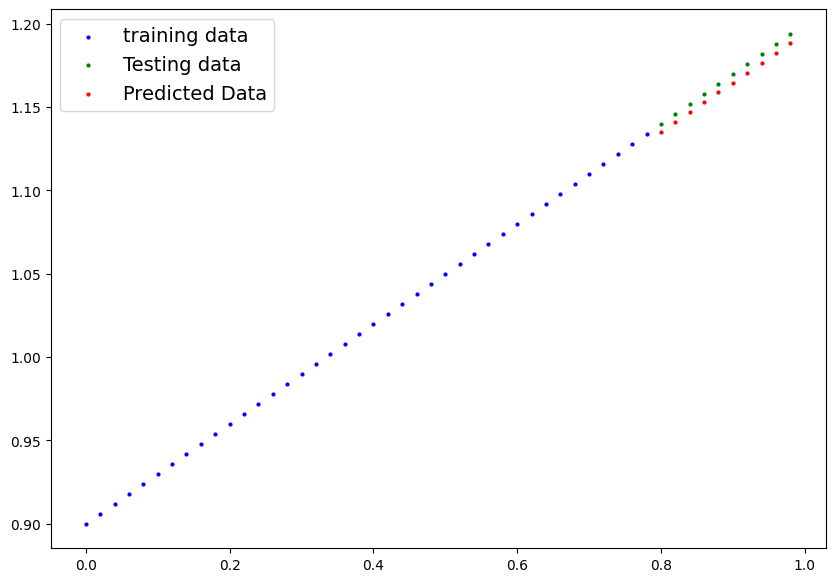

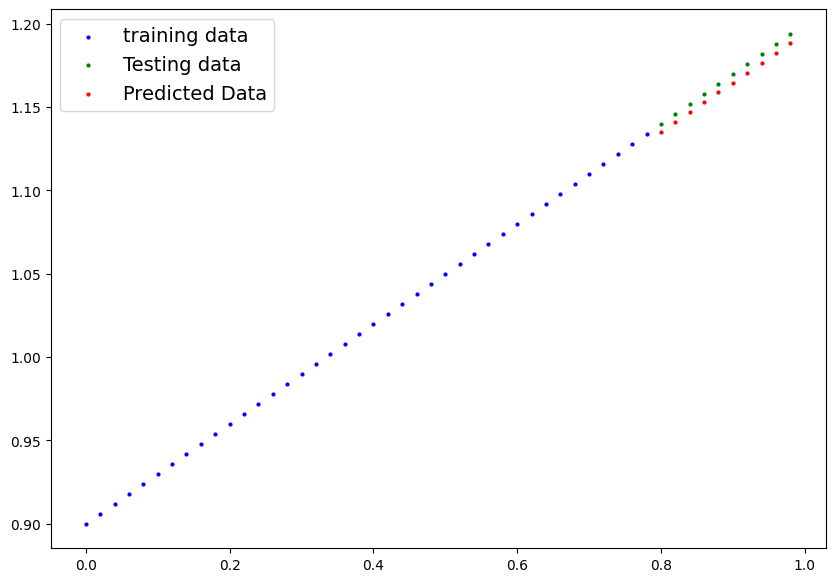

In [ ]:
# training

epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_2.train()

  # forward pass
  y_pred= model_2(X_train)

  # loss
  loss = loss_fn(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropogation
  loss.backward()

  # step
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
      plot_predictions(predictions=test_pred.cpu())
      print(f"Epoch: {epoch} | Loss: {loss} | TestLoss: {test_loss}")

In [ ]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2986]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9095], device='cuda:0'))])

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)
y_preds

tensor([[1.1484],
        [1.1544],
        [1.1604],
        [1.1663],
        [1.1723],
        [1.1783],
        [1.1842],
        [1.1902],
        [1.1962],
        [1.2022]], device='cuda:0')

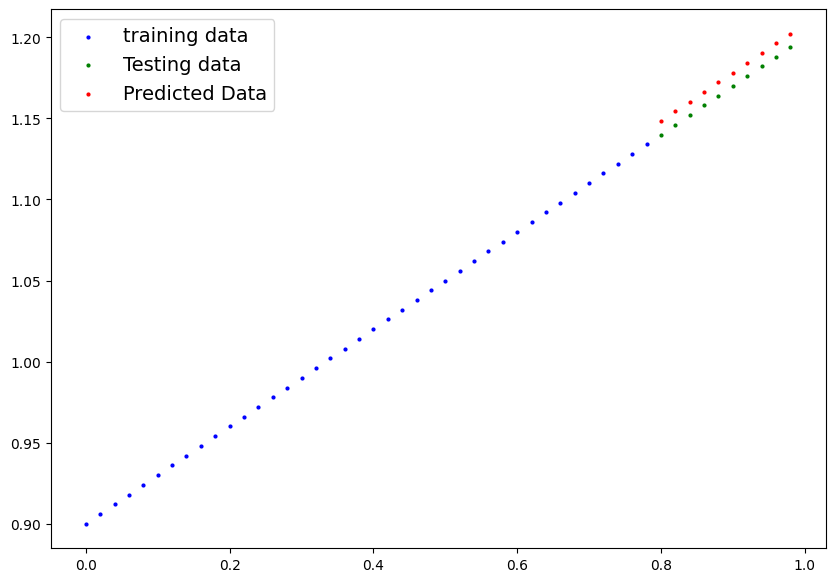

In [ ]:
plot_predictions(predictions=y_preds.cpu())